In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Set the seaborn style to "ticks"
file_path="/home/v-chengweihu/code/CRL-change/output/converted/all_training_logs_in_one_file.csv"
sns.set_style("ticks")
data=pd.read_csv(file_path)
data["method"]=data["metric"].apply(lambda x:x.split("---")[0])
data["figure"]=data["metric"].apply(lambda x:x.split("---")[1])


In [5]:

method2name={
    'TACRED-0.5random-0.5topk':'Mix random and K Nearest',
'TACRED-retrieve_topk':'K Nearest',
'TACRED-retrieve_topk-high_lr':'K Nearest-H',
'TACRED-TOTAL_RANDOM':"Random",
'TACRED-retrieve_every_class-high_lr':"Balanced Class",
'TACRED-retrieve_every_class':"Balanced Class-H"
}
def draw_pic(fig_title,y_label='Accuracy'):
    unique_methods=data["method"].unique()
    # Define the x and y coordinates of the line
    methods_plot={}
    for u_method in unique_methods:
        new_data=data.loc[(data["method"]==u_method) & (data["figure"]==fig_title)]
        methods_plot[u_method]=new_data
    # Set the seaborn style to "ticks"
    sns.set_style("ticks")
    # Plot the line using seaborn and matplotlib
    for k,v in methods_plot.items():
        sns.lineplot(x='step', y='value', data=v, label=method2name[k])
    # sns.lineplot(x='step', y='value', data=methods_plot[0], color='black',label=u_method)

    # Add labels to the axes
    plt.xlabel('Task', fontsize=14)
    plt.ylabel(y_label, fontsize=14)

    # Add a title to the plot
    plt.title(fig_title, fontsize=16)

    # Adjust the axis limits
    # plt.xlim(-0.5, 5.5)
    # plt.ylim(-0.5, 5.5)
    plt.legend()
    # Show the plot
    plt.show()


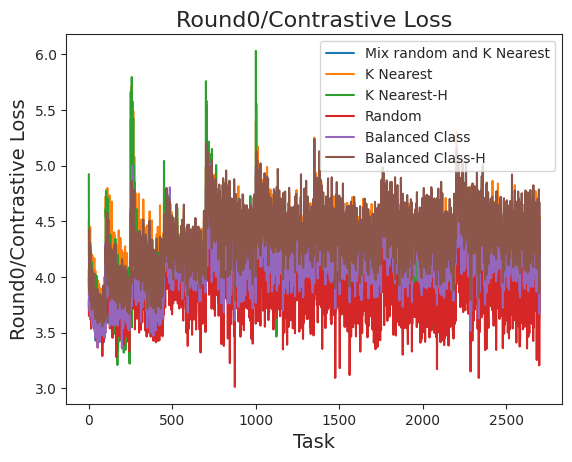

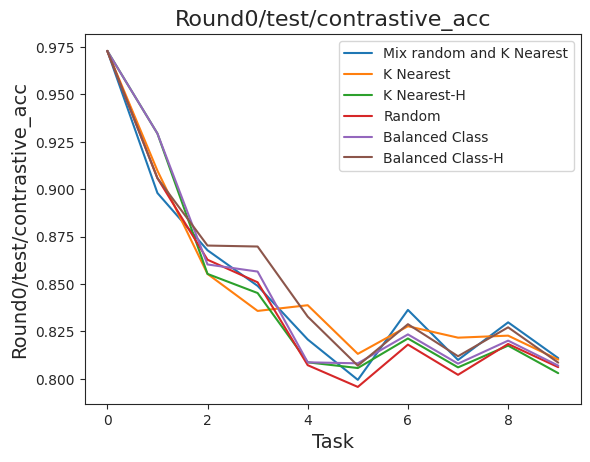

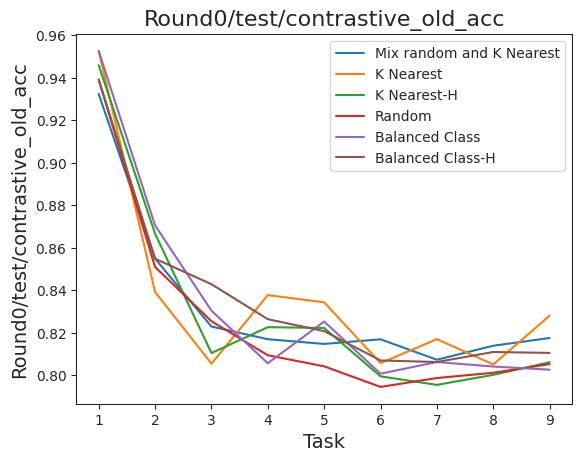

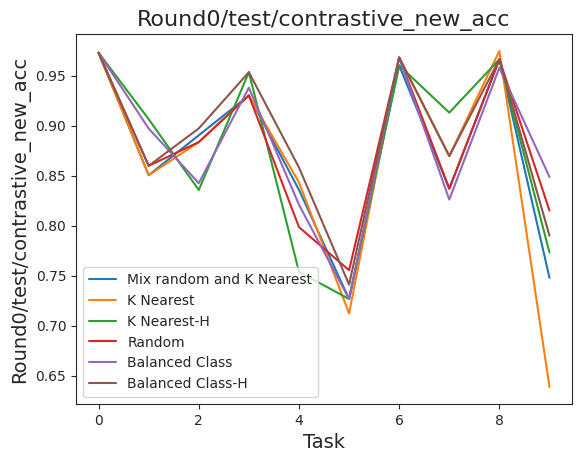

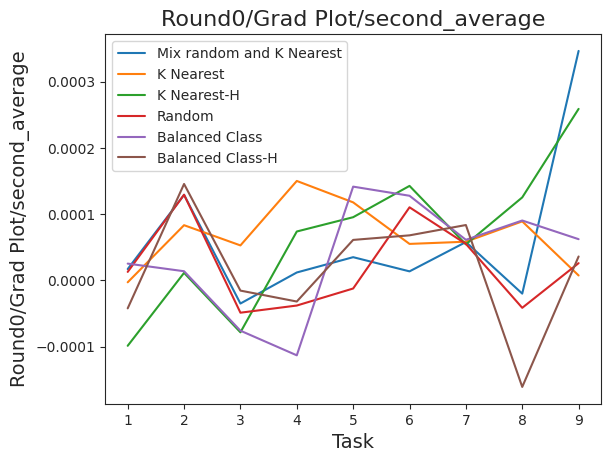

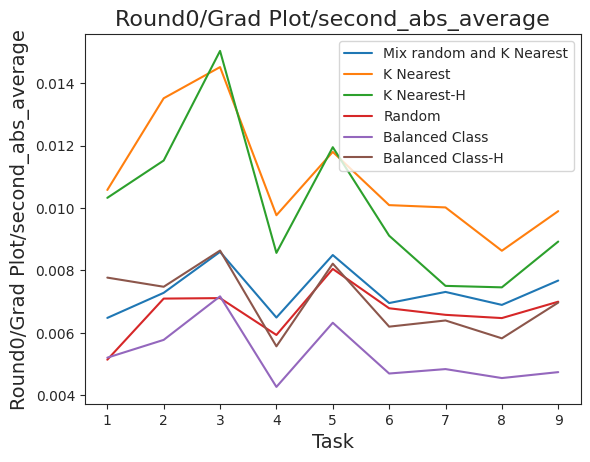

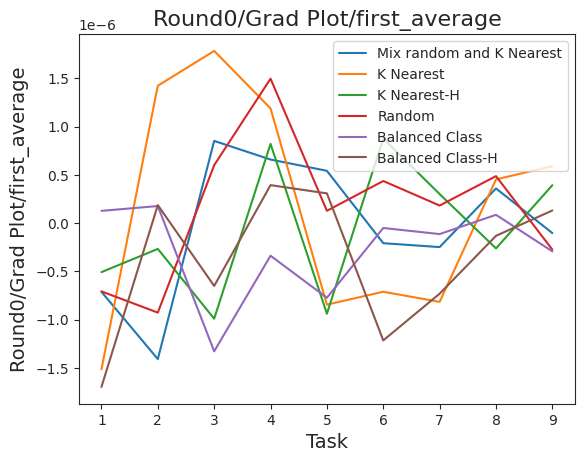

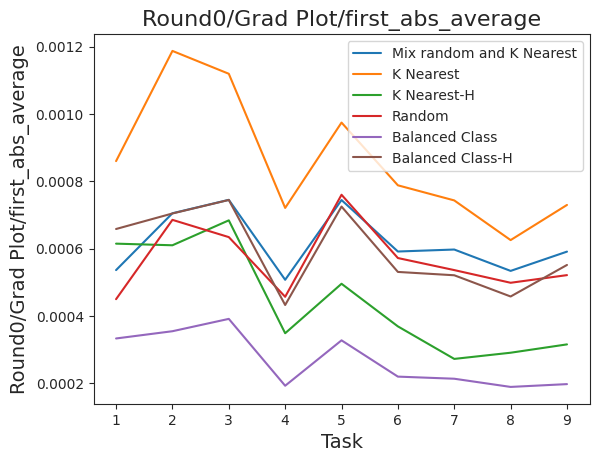

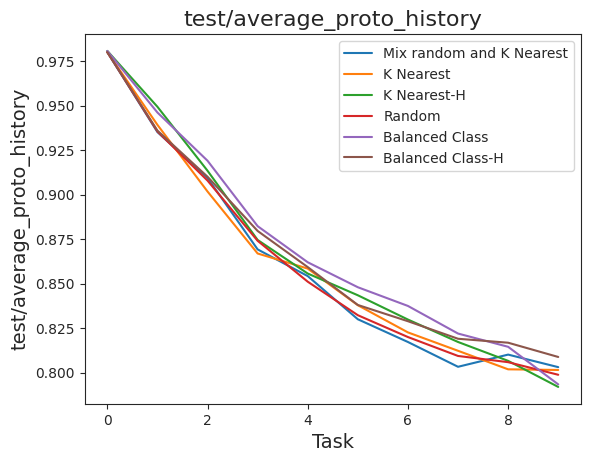

In [6]:

draw_list=[
'Round0/Contrastive Loss',
'Round0/test/contrastive_acc',
'Round0/test/contrastive_old_acc',
'Round0/test/contrastive_new_acc',
'Round0/Grad Plot/second_average',
'Round0/Grad Plot/second_abs_average',
'Round0/Grad Plot/first_average',
'Round0/Grad Plot/first_abs_average',
"test/average_proto_history"
]
label_list=[
'Round0/Contrastive Loss',
'Round0/test/contrastive_acc',
'Round0/test/contrastive_old_acc',
'Round0/test/contrastive_new_acc',
'Round0/Grad Plot/second_average',
'Round0/Grad Plot/second_abs_average',
'Round0/Grad Plot/first_average',
'Round0/Grad Plot/first_abs_average',
"test/average_proto_history",
]
for v1,v2 in zip(draw_list,label_list):
    draw_pic(fig_title=v1,y_label=v2)



In [ ]:
fig_title="test/average_proto_history"
draw_pic(fig_title=fig_title)